# Tweaking plots

In this section we cover a some points about adjusting the appearance of plots

## <tt>Matplotlib</tt>

<tt>Seaborn</tt> is designed to produce nice looking plots without us having to manually set many options

If we want to manually set something like the axis labels or axis range, many of the functions for doing this are from the <tt>Matplotlib</tt> library which contains a lot of lower level plotting functions (things that produce or edit bits of plots, rather than producing a whole nice figure in one step). 

In the olden days, people made plots just with <tt>Matplotlib</tt> and had to write a lot more code to achieve a nice looking plot.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Import the data

We'll use the Titanic data again

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/titanic_2.csv')
display(titanic)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Subplot

Say for some reason we want to plot a histogram of age separately for men and women.

We might like to show these plots next to eachother as panels of a larger figure

This is achieved using the function <tt>plt.subplot</tt> which creates... a figure with multiple panels or subplots.

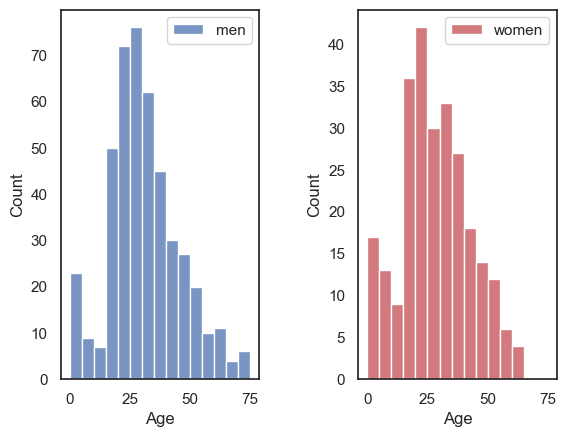

In [3]:
plt.subplot(1,2,1)
sns.histplot(data=titanic.loc[titanic.Sex=='male'], x='Age', color='b', bins=range(0,80,5))
plt.legend(['men'])

plt.subplot(1,2,2)
sns.histplot(data=titanic.loc[titanic.Sex=='female'], x='Age', color='r', bins=range(0,80,5))
plt.legend(['women'])

plt.subplots_adjust(wspace = 0.5) # shift the plots sideways so they don't overlap

The arguments of <tt>plt.subplot</tt> are the number of rows and columns to be created in the figure, and then the location in which to place the next plot.

In the example above we have one row and two columns, hence we call <tt>plt.subplot(1 [rows],2 [columns],1 [location for next plot])</tt> for the first plot.

Can you change the code in the block below to organize the panels one above the other, rather than next to each other?

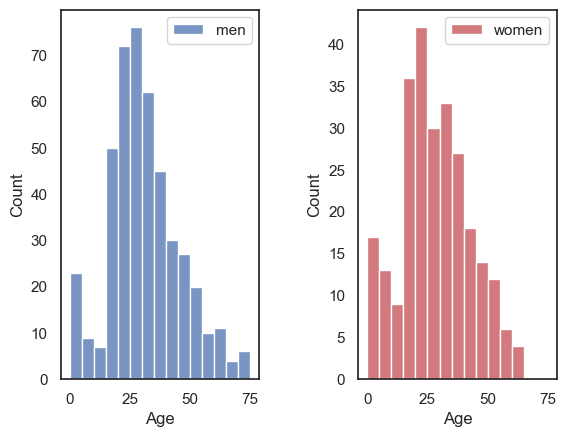

In [4]:
plt.subplot(1,2,1) # edit this line!
sns.histplot(data=titanic.loc[titanic.Sex=='male'], x='Age', color='b', bins=range(0,80,5))
plt.legend(['men'])

plt.subplot(1,2,2) # edit this line!
sns.histplot(data=titanic.loc[titanic.Sex=='female'], x='Age', color='r', bins=range(0,80,5))
plt.legend(['women'])

plt.subplots_adjust(wspace = 0.5) # shift the plots sideways so they don't overlap

Ah, it's actually a bit easier to compare the distributions when they are arranged vertically! Good choice!

Can you edit the code block below to produce three stacked subplots showing the age distribution in each class?

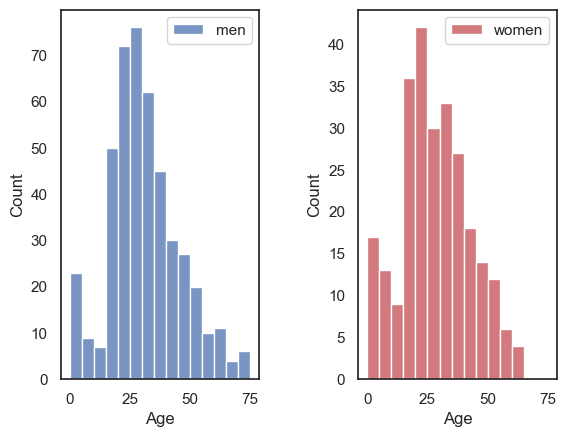

In [5]:
# Edit this code block!

plt.subplot(1,2,1) 
sns.histplot(data=titanic.loc[titanic.Sex=='male'], x='Age', color='b', bins=range(0,80,5))
plt.legend(['men'])

plt.subplot(1,2,2) 
sns.histplot(data=titanic.loc[titanic.Sex=='female'], x='Age', color='r', bins=range(0,80,5))
plt.legend(['women'])

plt.subplots_adjust(wspace = 0.5) # shift the plots sideways so they don't overlap

### Adjust axes

It is often easier to compare across plots if the axis ranges are the same. 

Seaborn will automatically adjust the axes to fit the range of the data in each plot, which normally means the axis ranges don't match across subplots.

We can set the axis range using the functions <tt>plt.ylim</tt> (to set the limits in y) and <tt>plt.xlim</tt> (to set the limits in x)

Let's remake our two side-by-side subbplots of age of men and women, and this time set the y axis to have the same range

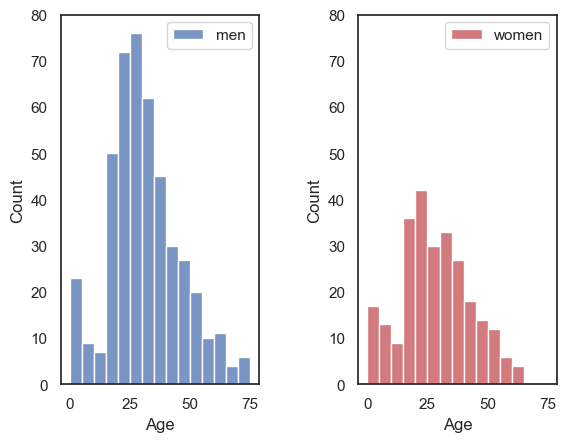

In [6]:
plt.subplot(1,2,1) 
sns.histplot(data=titanic.loc[titanic.Sex=='male'], x='Age', color='b', bins=range(0,80,5))
plt.ylim([0,80])
plt.legend(['men'])

plt.subplot(1,2,2) 
sns.histplot(data=titanic.loc[titanic.Sex=='female'], x='Age', color='r', bins=range(0,80,5))
plt.ylim([0,80])
plt.legend(['women'])

plt.subplots_adjust(wspace = 0.5) # shift the plots sideways so they don't overlap

Ooh, suddenly we can see that there were a lot more men than women on the Titanic!

### Set axis labels

Your axis labels should always convey what is plotted. If you are using <tt>Seaborn</tt> with a <tt>Pandas</tt> dataframe, the axis labels will often be the column labels from your dataframe, which are (usually) meaningful although sometimes they are odd codes that wouldn't mean much to a naive reader (The titanic dataset is a culprit here - what is Pclass? SibSp? Parch?!).

You can always edit the labels on the axes and unless their meaning is clear, you must do so.

Just for fun let's label the x axis "bananas" and the y axis "fruitbats"

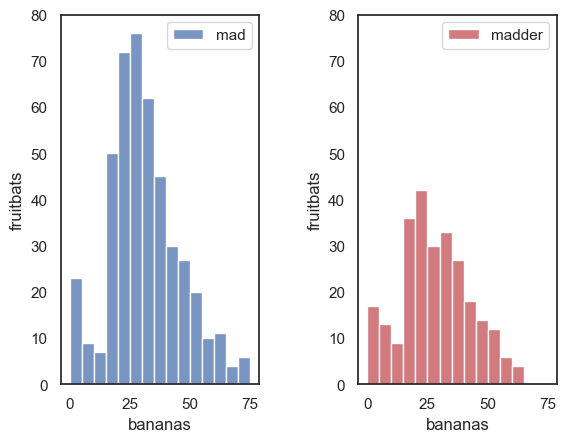

In [7]:
plt.subplot(1,2,1) 
sns.histplot(data=titanic.loc[titanic.Sex=='male'], x='Age', color='b', bins=range(0,80,5))
plt.ylim([0,80])
plt.xlabel('bananas')
plt.ylabel('fruitbats')
plt.legend(['mad'])

plt.subplot(1,2,2) 
sns.histplot(data=titanic.loc[titanic.Sex=='female'], x='Age', color='r', bins=range(0,80,5))
plt.ylim([0,80])
plt.xlabel('bananas')
plt.ylabel('fruitbats')
plt.legend(['madder'])

plt.subplots_adjust(wspace = 0.5) # shift the plots sideways so they don't overlap